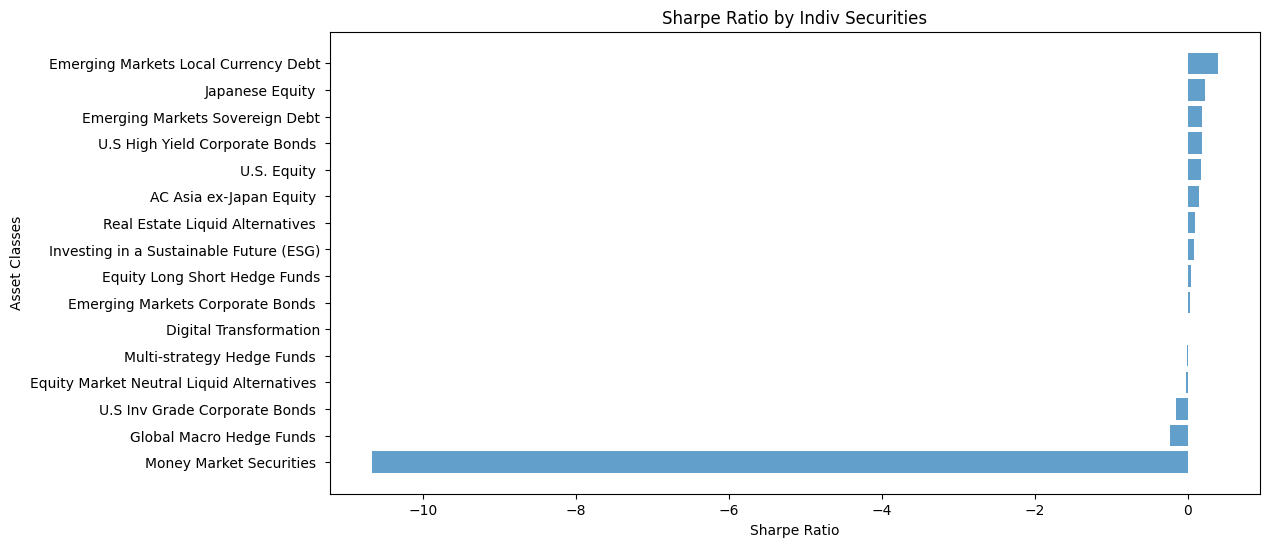

Fixed Income 0.032
Equities 0.0561
Fixed Income 0.057
Fixed Income 0.0846
Equities 0.042
Equities 0.008
Alternatives 0.0655
Thematics 0.0886
Alternatives 0.07
Fixed Income 0.0394
Thematics 0.0465
Alternatives 0.0294
Alternatives 0.0556
Fixed Income 0.0373
Alternatives 0.042
Fixed Income 0.0562
----


In [228]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("APPENDIX DATA.xlsx", sheet_name="ReturnData")

risk_free_rate =0.04
df['Sharpe Ratio'] = (df['Expected Return'] - risk_free_rate) / df['Expected Volatility']
df = df.sort_values(by='Sharpe Ratio', ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(df['Security'], df['Sharpe Ratio'], alpha=0.7)
plt.xlabel('Sharpe Ratio')
plt.ylabel('Asset Classes')
plt.title('Sharpe Ratio by Indiv Securities')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest Sharpe Ratio at the top
plt.show()

for i, asset in enumerate(df["Asset Classes"]):
    print(asset, df["Expected Return"][i])
print("----")


{'whiskers': [<matplotlib.lines.Line2D at 0x126f3f710>,
 'caps': [<matplotlib.lines.Line2D at 0x126e64f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x126e43750>],
 'medians': [<matplotlib.lines.Line2D at 0x126e65290>],
 'fliers': [<matplotlib.lines.Line2D at 0x126e67590>],
 'means': []}

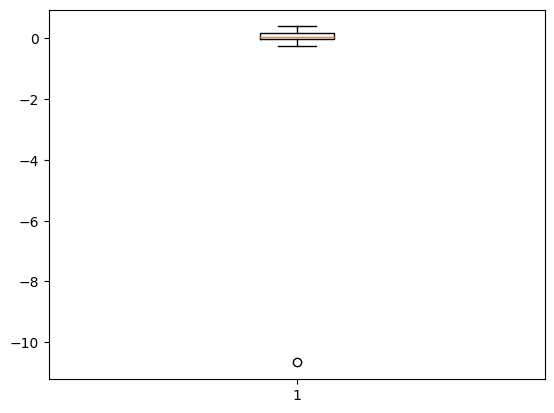

In [229]:
plt.boxplot(df["Sharpe Ratio"])

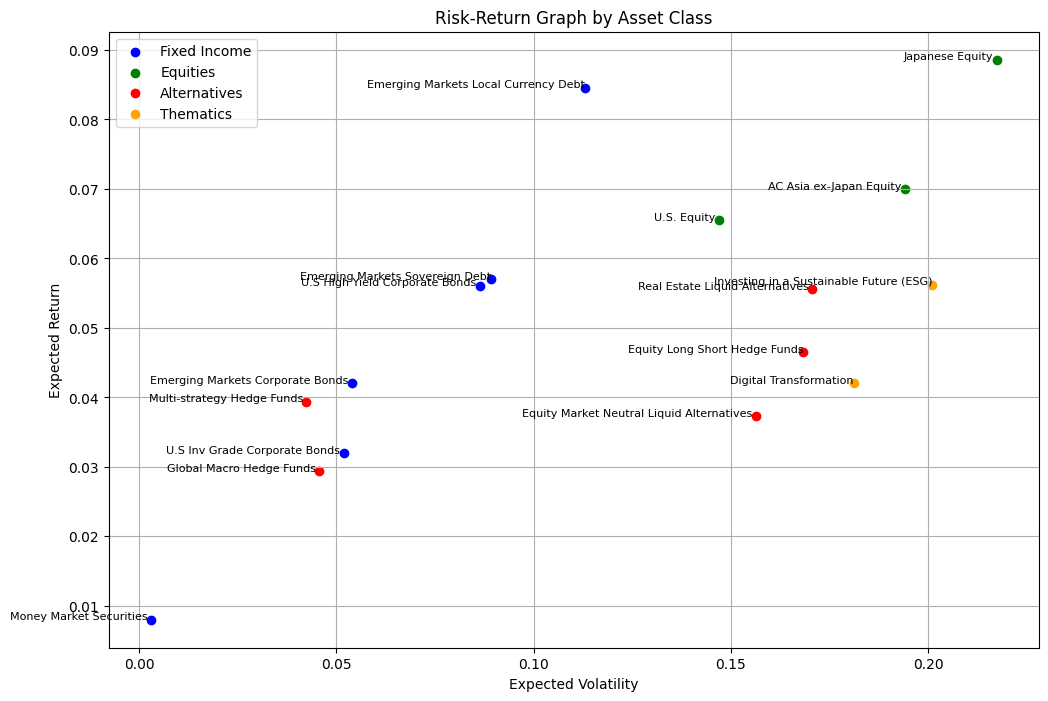

In [230]:
from sklearn.cluster import KMeans

# Create a color map for asset classes
colors = {
    "Fixed Income": "blue",
    "Equities": "green",
    "Alternatives": "red",
    "Thematics": "orange"
}

# Create a scatter plot for risk-return graph
plt.figure(figsize=(12, 8))
for asset_class, color in colors.items():
    asset_class_data = df[df["Asset Classes"] == asset_class]
    plt.scatter(
        asset_class_data["Expected Volatility"],
        asset_class_data["Expected Return"],
        label=asset_class,
        color=color,
        marker="o",
    )

# Add labels to data points (individual securities)
for i, asset in df.iterrows():
    plt.annotate(asset["Security"], (asset["Expected Volatility"], asset["Expected Return"]), fontsize=8, ha="right")

plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.title("Risk-Return Graph by Asset Class")
plt.legend()
plt.grid(True)
plt.show()

    Weight (Digital Transformation)  Weight (Sustainable Future)  \
45                             0.45                         0.55   

    Expected Return  Expected Volatility  
45          0.04839             0.134616  


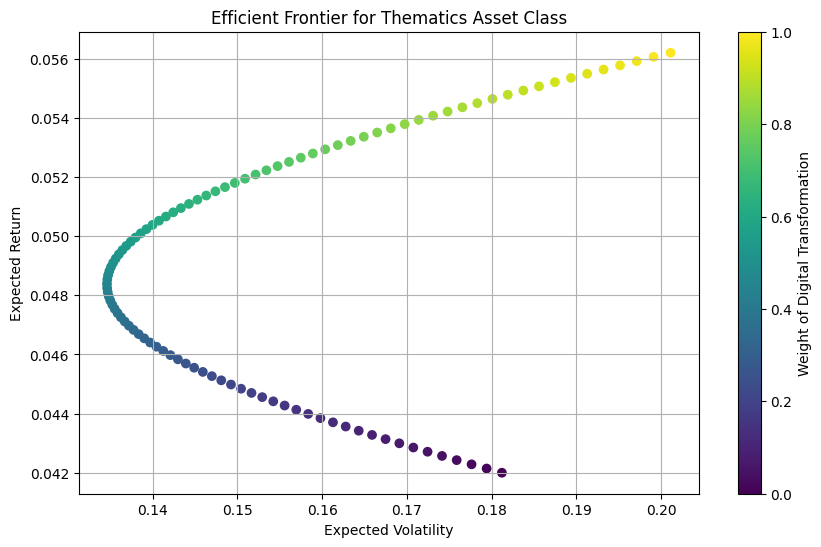

In [231]:
data = df[df["Asset Classes"] == "Thematics"]
data


# Define the range of weights for one asset
weights_digital_transformation = np.arange(0, 1.01, 0.01)

# Initialize lists to store portfolio metrics
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights_digital_transformation = []

# Calculate portfolio metrics for each weight combination
for weight_digital_transformation in weights_digital_transformation:
    weight_sustainable_future = 1 - weight_digital_transformation

    # Calculate portfolio expected return as a weighted average
    portfolio_return = (
        weight_digital_transformation * data["Expected Return"].values[0] +
        weight_sustainable_future * data["Expected Return"].values[1]
    )

    # Calculate portfolio expected volatility as a weighted average
    portfolio_volatility = np.sqrt(
        (weight_digital_transformation * data["Expected Volatility"].values[0]) ** 2 +
        (weight_sustainable_future * data["Expected Volatility"].values[1]) ** 2
    )

    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights_digital_transformation.append(weight_digital_transformation)

# Create a DataFrame to store the results
portfolio_df = pd.DataFrame({
    "Weight (Digital Transformation)": portfolio_weights_digital_transformation,
    "Weight (Sustainable Future)": [1 - w for w in portfolio_weights_digital_transformation],
    "Expected Return": portfolio_returns,
    "Expected Volatility": portfolio_volatilities
})

# Identify portfolios on the efficient frontier (e.g., those with the minimum volatility)
efficient_frontier_df = portfolio_df[portfolio_df["Expected Volatility"] == min(portfolio_df["Expected Volatility"])]

# Display the table of portfolios on the efficient frontier
print(efficient_frontier_df)

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_weights_digital_transformation, cmap='viridis', marker='o')
plt.colorbar(label='Weight of Digital Transformation')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier for Thematics Asset Class')
plt.grid(True)
plt.show()






## Get Allocation of Securities within Asset Class

In [341]:

def get_securities_allocation(data):
    # Define an objective function to minimize - Sharpe ratio in this case
    def calculate_portfolio_metrics(weights, expected_returns, expected_volatilities, risk_free_rate):
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_volatility = np.sqrt(np.dot(weights, np.dot(np.diag(expected_volatilities), weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
        return -sharpe_ratio  # Minimize negative Sharpe ratio for optimization

    # Define optimization constraints (sum of weights should be 1)
    constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

    # Define optimization bounds (weights should be between 0 and 1)
    bounds = tuple((0, 1) for _ in range(len(data)))

    # Define risk-free rate (you can set this to your chosen rate)
    risk_free_rate = 0.04

    # Initialize weights for optimization
    initial_weights = np.array([1 / len(data)] * len(data))

    # Perform optimization to maximize Sharpe ratio
    result = minimize(calculate_portfolio_metrics, initial_weights, args=(
        np.array([security["Expected Return"] for i, security in data.iterrows()]),
        np.array([security["Expected Volatility"] for i,security in data.iterrows()]),
        risk_free_rate
    ), method='SLSQP', bounds=bounds, constraints=constraints)

    # Get optimized portfolio weights
    optimized_weights = result.x

    # Print the optimized weights
    for i, security in data.iterrows():
        print(f"{security['Security']}: {optimized_weights[i] * 100:.2f}%")

    # Print the maximum Sharpe ratio achieved
    print(f"Maximum Sharpe Ratio: {-result.fun:.4f}")

In [244]:

data_fixed_income = df[df["Asset Classes"] == "Fixed Income"]
data_fixed_income

get_securities_allocation(data_fixed_income)

Emerging Markets Local Currency Debt: 16.50%
Emerging Markets Sovereign Debt: 22.42%
U.S High Yield Corporate Bonds : 22.45%
Emerging Markets Corporate Bonds : 2.77%
U.S Inv Grade Corporate Bonds : 35.86%
Money Market Securities : 0.00%
Maximum Sharpe Ratio: 0.2125


## Efficient Frontier 

In [304]:
def get_table_portfolios(data, asset_class):

    # Extract expected returns and volatilities into arrays
    expected_returns = np.array([security["Expected Return"] for i,security in data.iterrows()])
    expected_volatilities = np.array([security["Expected Volatility"] for i, security in data.iterrows()])
    p_ret = [] # Define an empty array for portfolio returns
    p_vol = [] # Define an empty array for portfolio volatility
    p_weights = [] # Define an empty array for asset weights
    num_securities = len(expected_returns)
    print(num_securities)
    num_portfolios = 10000
    for portfolio in range(num_portfolios):
        weights = np.random.random(num_securities)
        # print(weights)?
        weights = weights/np.sum(weights)
        p_weights.append(weights)
        returns = np.dot(weights, expected_returns) # Returns are the product of individual expected returns of asset and its 
                                        # weights 
        p_ret.append(returns)
        volatility = np.sqrt(np.dot(weights ** 2, expected_volatilities ** 2 ))
        p_vol.append(volatility)
    
    results_data = {'Returns':p_ret, 'Volatility':p_vol}


    for i, security in data.iterrows():
        asset_name = security["Security"]
        weights_column_name = f"{asset_name} Weight"
        weights = [weights[i] for weights in p_weights]
        results_data[weights_column_name] = weights

    portfolios = pd.DataFrame(results_data)
    # portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])
    # plotting the minimum volatility portfolio
    # Plotting optimal portfolio
    plt.subplots(figsize=(10, 10))
    plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
    plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
    plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
    plt.title(asset_class + " Min and Opt Portfolio")
    # Show the subplots
    plt.show()
    return portfolios.head()



## Fixed Income

6


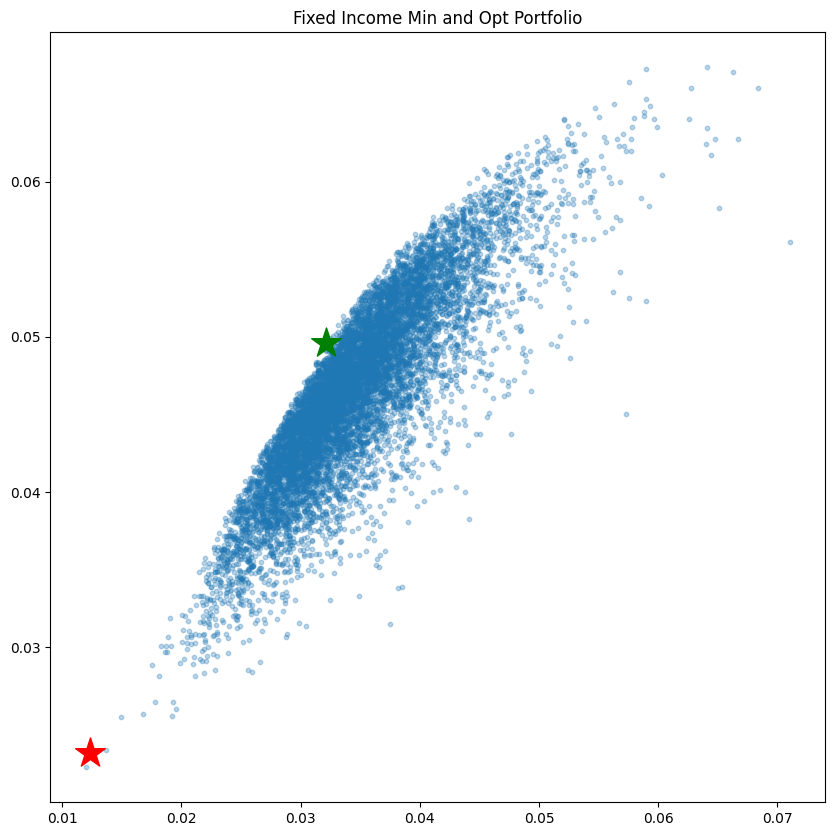

In [305]:
graphs = get_table_portfolios(data_fixed_income, "Fixed Income")

### Min Risk Portfolio 

In [276]:

min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port


Returns                                        0.023172
Volatility                                     0.012303
Emerging Markets Local Currency Debt Weight    0.105351
Emerging Markets Sovereign Debt Weight         0.079146
U.S High Yield Corporate Bonds  Weight         0.069693
Emerging Markets Corporate Bonds  Weight       0.077914
U.S Inv Grade Corporate Bonds  Weight          0.032617
Money Market Securities  Weight                0.635278
Name: 8466, dtype: float64

### Optimal Portfolio

In [342]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                                        0.064461
Volatility                                     0.052181
Emerging Markets Local Currency Debt Weight    0.089097
Emerging Markets Sovereign Debt Weight         0.289988
U.S High Yield Corporate Bonds  Weight         0.255755
Emerging Markets Corporate Bonds  Weight       0.011556
U.S Inv Grade Corporate Bonds  Weight          0.348230
Money Market Securities  Weight                0.005376
Name: 6673, dtype: float64

## Equities

In [327]:

data_equities = df[df["Asset Classes"] == "Equities"]
data_equities.reset_index(drop=True,inplace=True)
data_equities


,Asset Classes,Security,Expected Return,Expected Volatility,Sharpe Ratio
0,Equities,Japanese Equity,0.0886,0.2174,0.223551
1,Equities,U.S. Equity,0.0655,0.1470,0.173469
2,Equities,AC Asia ex-Japan Equity,0.0700,0.1941,0.154560


In [328]:
get_securities_allocation(data_equities)

Japanese Equity : 37.59%
U.S. Equity : 33.58%
AC Asia ex-Japan Equity : 28.83%
Maximum Sharpe Ratio: 0.1806


3


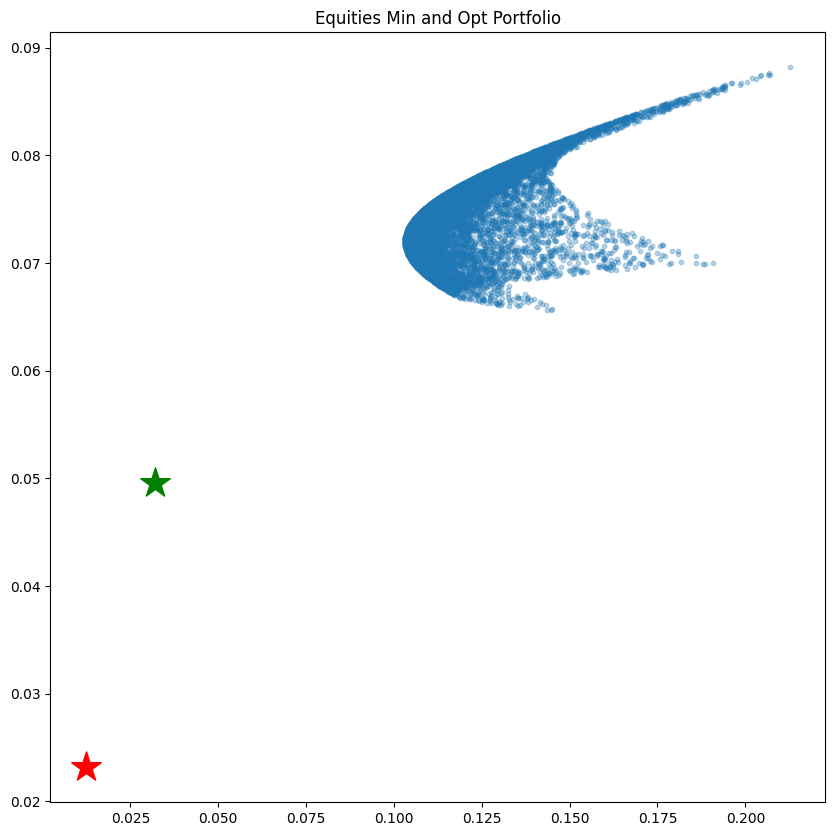

In [331]:
equity_port = get_table_portfolios(data_equities,"Equities")


In [344]:
min_vol_port = equity_port.iloc[equity_port['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                            0.075089
Volatility                         0.109256
Japanese Equity  Weight            0.357335
U.S. Equity  Weight                0.346113
AC Asia ex-Japan Equity  Weight    0.296553
Name: 2, dtype: float64

In [345]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
optimal_risky_port = equity_port.iloc[((equity_port['Returns']-rf)/equity_port['Volatility']).idxmax()]
optimal_risky_port

Returns                            0.075089
Volatility                         0.109256
Japanese Equity  Weight            0.357335
U.S. Equity  Weight                0.346113
AC Asia ex-Japan Equity  Weight    0.296553
Name: 2, dtype: float64

## Alternatives

In [346]:

data_alt = df[df["Asset Classes"] == "Alternatives"]
data_alt.reset_index(drop=True,inplace=True)
data_alt


,Asset Classes,Security,Expected Return,Expected Volatility,Sharpe Ratio
0,Alternatives,Real Estate Liquid Alternatives,0.0556,0.1707,0.091388
1,Alternatives,Equity Long Short Hedge Funds,0.0465,0.1684,0.038599
2,Alternatives,Multi-strategy Hedge Funds,0.0394,0.0424,-0.014151
3,Alternatives,Equity Market Neutral Liquid Alternatives,0.0373,0.1564,-0.017263
4,Alternatives,Global Macro Hedge Funds,0.0294,0.0456,-0.232456


In [339]:
get_securities_allocation(data_alt)

Real Estate Liquid Alternatives : 29.11%
Equity Long Short Hedge Funds: 18.99%
Multi-strategy Hedge Funds : 42.86%
Equity Market Neutral Liquid Alternatives : 9.04%
Global Macro Hedge Funds : 0.00%
Maximum Sharpe Ratio: 0.0888


5


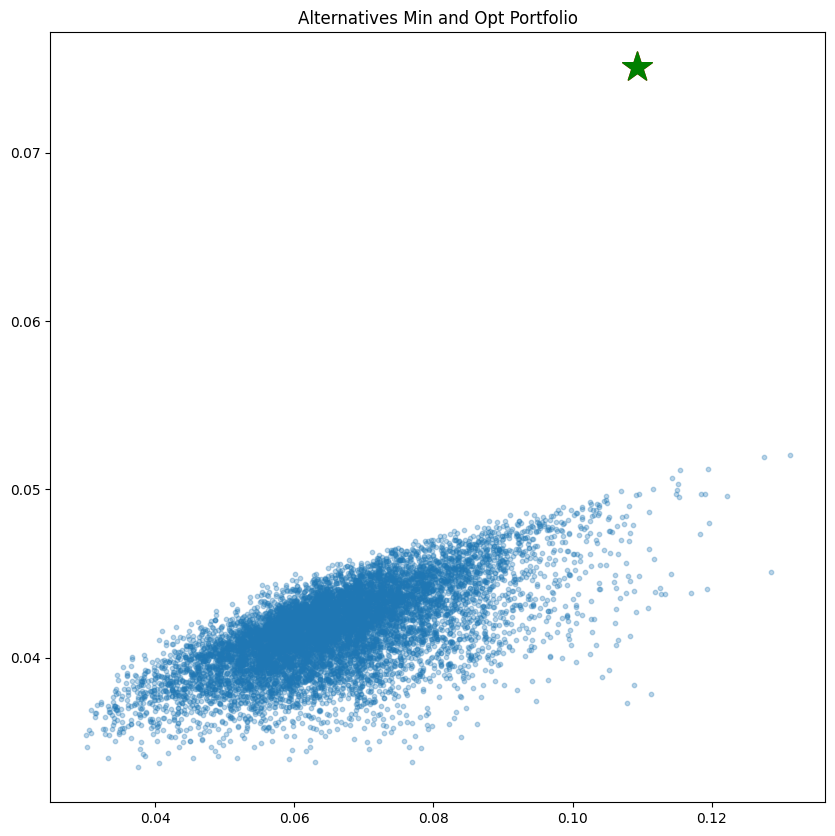

In [347]:
alt_port = get_table_portfolios(data_alt,"Alternatives")


In [348]:
min_vol_port = alt_port.iloc[alt_port['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                                              0.039893
Volatility                                           0.049896
Real Estate Liquid Alternatives  Weight              0.004578
Equity Long Short Hedge Funds Weight                 0.233425
Multi-strategy Hedge Funds  Weight                   0.536201
Equity Market Neutral Liquid Alternatives  Weight    0.129076
Global Macro Hedge Funds  Weight                     0.096720
Name: 3, dtype: float64

In [349]:
# Finding the optimal portfolio
rf = 0.04 # risk factor
optimal_risky_port = alt_port.iloc[((alt_port['Returns']-rf)/alt_port['Volatility']).idxmax()]
optimal_risky_port

Returns                                              0.043621
Volatility                                           0.062183
Real Estate Liquid Alternatives  Weight              0.332187
Equity Long Short Hedge Funds Weight                 0.100929
Multi-strategy Hedge Funds  Weight                   0.326729
Equity Market Neutral Liquid Alternatives  Weight    0.066365
Global Macro Hedge Funds  Weight                     0.173790
Name: 0, dtype: float64